In [1]:
import pickle

simworldname = 'simulationWorld(4jul11p).xml'
groundtruth = '4jul11p.csv'

f = open('Data_' + simworldname + '.pckl', 'rb')
data1, oracle1, analyzer1 = pickle.load(f)
f.close()

data = {}

In [2]:
###############################
#### DATA ANALYSIS SECTION ####
###############################

from datetime import datetime
import numpy as np

def AskLocationFromLocalizer(recent_grid):
    x, y = np.mean(zip(*np.where(recent_grid == np.max(recent_grid))), axis = 0)
    return [x/10, y/10]



readable_time_oracle = []
readable_time_analyzer = []
estimated_location = []
oracle_location = []

for t in oracle1['time']:
    readable_time_oracle.append(int(datetime.utcfromtimestamp(t/1000).strftime('%H%M%S')))
    
for t in analyzer1['time']:
    readable_time_analyzer.append(int(datetime.utcfromtimestamp(int(t)/1000).strftime('%H%M%S')))

for g in analyzer1['gridmap']:
    estimated_location.append(AskLocationFromLocalizer(g))
    
for t in oracle1['location']:
    oracle_location.append([t[0]/100, t[1]/100])


<IPython.core.display.Javascript object>


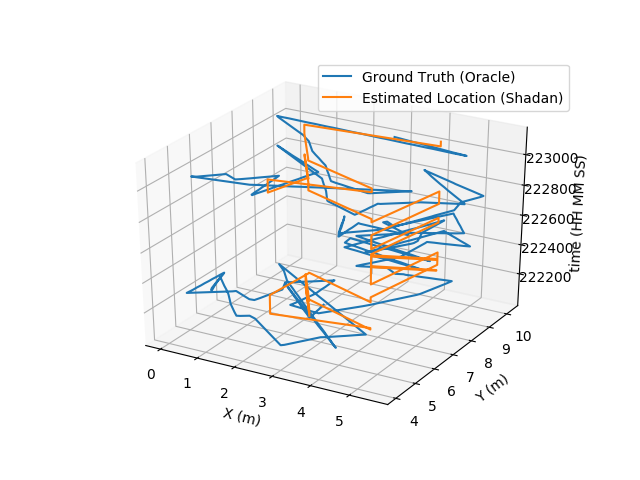

In [4]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(zip(*oracle_location)[0], zip(*oracle_location)[1],readable_time_oracle , label='Ground Truth (Oracle)')
ax.plot(zip(*estimated_location)[0], zip(*estimated_location)[1], readable_time_analyzer, label='Estimated Location (Shadan)')
# ax.plot(zip(*pruned_data_re[0:152])[0], zip(*pruned_data_re[0:152])[1], readable_time_analyzer, label='Real World Estimated Location (Parisa)')
ax.legend()
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('time (HH MM SS)')

plt.show()



In [5]:
for t in range(len(analyzer1['time'])):
    analyzer1['time'][t] = int(analyzer1['time'][t])

In [6]:
deleted_times = []
data2 = {}
data2['time'] = []
data2['location'] = []
unpredicted_start = 0

data2['time'] = sorted(set(analyzer1['time'] + oracle1['time']))


for t in data2['time']:
    try:
        data2['location'].append(AskLocationFromLocalizer(analyzer1['gridmap'][analyzer1['time'].index(t)]))
        # print("shadan")
    except:
        try:
            data2['location'].append(data2['location'][len(data2['location']) - 1])
            # print("no")
        except:
            deleted_times.append(t)
            unpredicted_start = unpredicted_start + 1
            # data['location'].append([0,0])

for t in deleted_times:
    data2['time'].remove(t)
            
temp_time = []
for t in data2['time']:
    temp_time.append(int(datetime.utcfromtimestamp(t/1000).strftime('%H%M%S')))



<IPython.core.display.Javascript object>


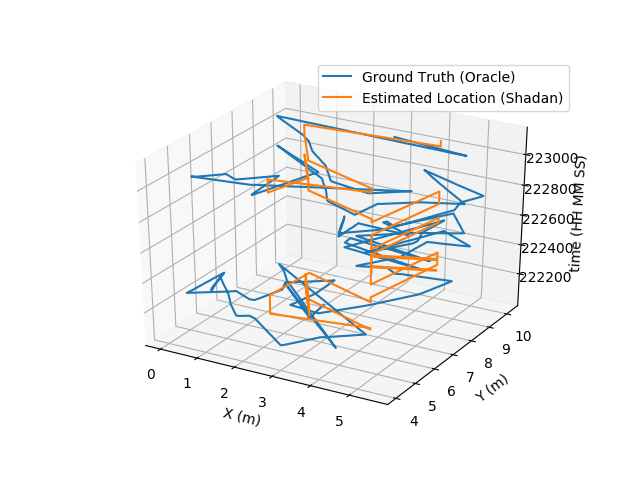

MSE:1.0466305249567198


In [7]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

%matplotlib notebook

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

# (x, y)
ax.plot(zip(*oracle_location)[0], zip(*oracle_location)[1], readable_time_oracle , label='Ground Truth (Oracle)')
ax.plot(zip(*data2['location'])[0], zip(*data2['location'])[1], temp_time, label='Estimated Location (Shadan)')

# (x)
# ax.plot(zip(*oracle_location)[0],readable_time_oracle , label='Ground Truth (Oracle)')
# ax.plot(zip(*data['location'])[0], temp_time, label='Estimated Location (Shadan)')

# (y)
# ax.plot(zip(*oracle_location)[0], zip(*oracle_location)[1],readable_time_oracle , label='Ground Truth (Oracle)')
# ax.plot(zip(*data['location'])[0], zip(*data['location'])[1], temp_time, label='Estimated Location (Shadan)')

ax.legend()
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('time (HH MM SS)')

plt.show()


print("MSE:" + str(mean_squared_error(zip(*oracle_location[unpredicted_start: len(oracle_location)]), zip(*data2['location']))))

<IPython.core.display.Javascript object>


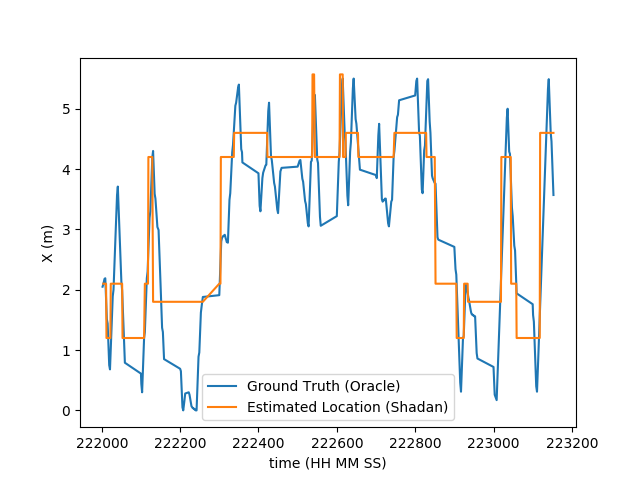

MSE:0.6968766121783134


In [8]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

%matplotlib notebook

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()

# (x, y)
# ax.plot(zip(*oracle_location)[0], zip(*oracle_location)[1],readable_time_oracle , label='Ground Truth (Oracle)')
# ax.plot(zip(*data['location'])[0], zip(*data['location'])[1], temp_time, label='Estimated Location (Shadan)')

# (x)
plt.plot(readable_time_oracle, zip(*oracle_location)[0] , label='Ground Truth (Oracle)')
plt.plot(temp_time, zip(*data2['location'])[0], label='Estimated Location (Shadan)')

# (y)
# ax.plot(zip(*oracle_location)[0], zip(*oracle_location)[1],readable_time_oracle , label='Ground Truth (Oracle)')
# ax.plot(zip(*data['location'])[0], zip(*data['location'])[1], temp_time, label='Estimated Location (Shadan)')

plt.legend()
plt.xlabel('time (HH MM SS)')
plt.ylabel('X (m)')

plt.show()


print("MSE:" + str(mean_squared_error(zip(*oracle_location)[0][unpredicted_start: len(oracle_location)], zip(*data2['location'])[0])))

<IPython.core.display.Javascript object>


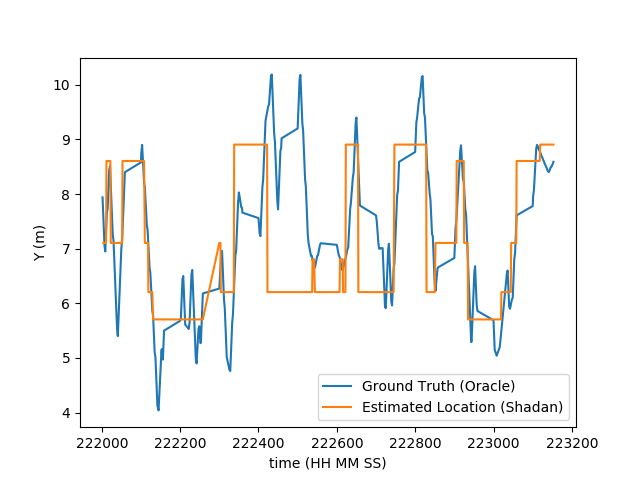

MSE:1.3963844377351267


In [9]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

%matplotlib notebook

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()

# (x, y)
# ax.plot(zip(*oracle_location)[0], zip(*oracle_location)[1],readable_time_oracle , label='Ground Truth (Oracle)')
# ax.plot(zip(*data['location'])[0], zip(*data['location'])[1], temp_time, label='Estimated Location (Shadan)')

# (y)
plt.plot(readable_time_oracle, zip(*oracle_location)[1] , label='Ground Truth (Oracle)')
plt.plot(temp_time, zip(*data2['location'])[1], label='Estimated Location (Shadan)')


plt.legend()
plt.xlabel('time (HH MM SS)')
plt.ylabel('Y (m)')

plt.show()


print("MSE:" + str(mean_squared_error(zip(*oracle_location)[1][unpredicted_start: len(oracle_location)], zip(*data2['location'])[1])))

In [10]:
errors = []
for i in range(len(data2['location'])):
    errors.append(np.linalg.norm(np.asarray(oracle_location[i]) - np.asarray(data2['location'][i])))

In [11]:
import matplotlib.pyplot as plt

print(np.max(errors))
print(reduce(lambda x, y: x + y, errors) / len(errors))
# plt.plot(errors)

3.9849565491959362
1.3338225760360098


In [12]:
from scipy.stats import ttest_ind

print("T-test for ground truth and Shadan: ")
print(ttest_ind(oracle_location, data2['location']))

T-test for ground truth and Shadan: 
Ttest_indResult(statistic=array([-3.18621636,  2.18462731]), pvalue=array([0.00147783, 0.02910504]))
